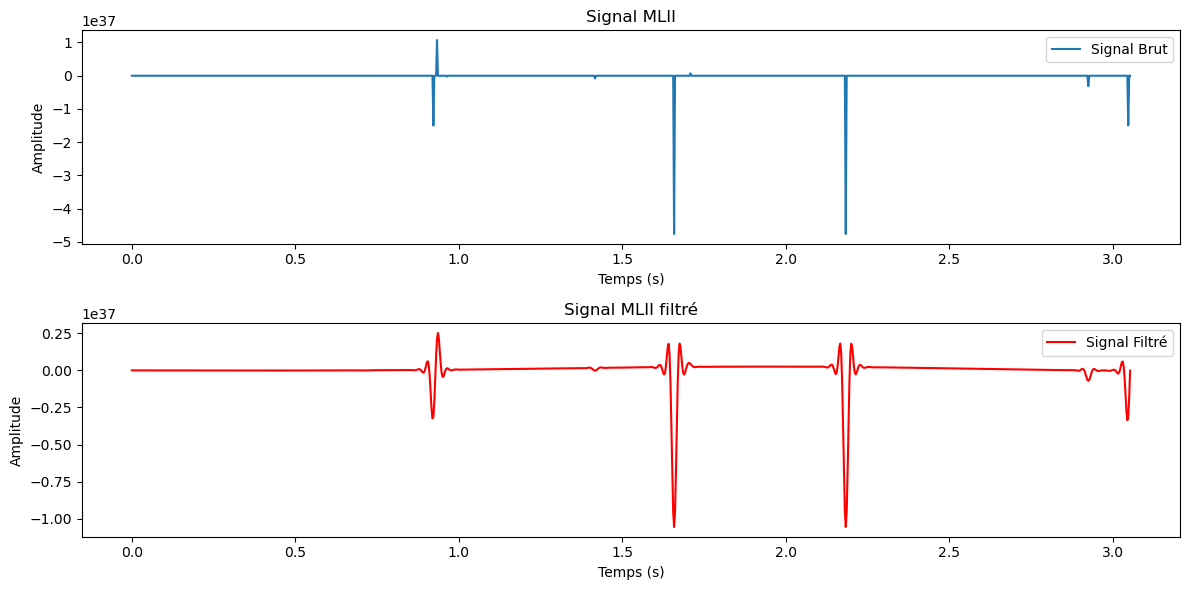

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Charger les données du fichier CSV
data = pd.read_csv("106.csv",nrows=1100)

# Extraire les colonnes MLII et V5
ml2_data = data["Valeur"].values
#v5_data = data["V5"].values

# Paramètres du signal ECG
sampling_rate = 360  # Taux d'échantillonnage en Hz
nyquist_freq = 0.5 * sampling_rate

# Filtrage du signal ECG
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

# Appliquer un filtre passe-bande aux signaux MLII et V5
filtered_ml2 = bandpass_filter(ml2_data, 0.5, 40, sampling_rate)
#filtered_v5 = bandpass_filter(v5_data, 0.5, 40, sampling_rate)

# Normalisation
normalized_ml2 = (filtered_ml2 - np.mean(filtered_ml2)) / np.std(filtered_ml2)
#normalized_v5 = (filtered_v5 - np.mean(filtered_v5)) / np.std(filtered_v5)

################################################
# Créer un nouveau DataFrame avec les données filtrées
filtered_data = pd.DataFrame({'MLII_filtered': filtered_ml2})

# Enregistrer les données filtrées dans un nouveau fichier CSV
filtered_data.to_csv('donnees_filtrees_106.csv', index=True)
################################################

# Affichage des signaux
time = np.arange(len(ml2_data)) / sampling_rate

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, ml2_data)
#plt.plot(time, filtered_ml2)
#plt.plot(time, normalized_ml2)
plt.title("Signal MLII")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend(["Signal Brut"])

#plt.subplot(2, 1, 2)
#plt.plot(time, ml2_data)
#plt.plot(time, filtered_ml2)
#plt.plot(time, normalized_ml2)
#plt.title("Signal MLII")
#plt.xlabel("Temps (s)")
#plt.ylabel("Amplitude")
#plt.legend(["Brut", "Filtré", "Normalisé"])

plt.subplot(2, 1, 2)
#plt.plot(time, v5_data)
plt.plot(time, filtered_ml2, 'r')
#plt.plot(time, normalized_v5)
plt.title("Signal MLII filtré")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend(["Signal Filtré"])

plt.tight_layout()
plt.show()
